In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import linregress

%matplotlib widget
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
#plt.style.use('dark_background')

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

In [2]:
#pack df of measured data (measured 2/23/23) from CSVs

# Directory containing the CSV files
data_dir_new = './data'

# List of file indices to ignore
bad_data_idx = []

# Columns to extract from the CSV
columns_to_extract = ['Frequency', 'S11_Magnitude']

# Initialize an empty DataFrame to hold the data
df_meas = pd.DataFrame()

# List all files in the directory that match the pattern and are not in the bad data index
for filename in (os.listdir(data_dir_new)):
    # Construct full file path
    file_path = os.path.join(data_dir_new, filename)
    # Read the CSV file
    temp_df = pd.read_csv(file_path, usecols=columns_to_extract)
    # Add the index column
    temp_df['Index'] = filename
    # Append to the main DataFrame
    df_meas = pd.concat([df_meas, temp_df], ignore_index=True)


#VNA has glitch at 62.00MHz. Replace it with average of two adjacent bins
# Filter rows for the frequencies 61928888 and 62071111 across all indexes
adjacent_freqs_df = df_meas[df_meas['Frequency'].isin([61928888, 62071111])]

# Calculate the average for each S parameter for these frequencies by Index
avg_s_params = adjacent_freqs_df.groupby('Index').mean().drop(columns=['Frequency'])

# Replace the S parameters for frequency 62000000 Hz with the calculated averages
for idx, row in avg_s_params.iterrows():
    df_meas.loc[(df_meas['Frequency'] == 62000000) & (df_meas['Index'] == idx), ['S11_Magnitude', 'S11_Phase', 'S12_Magnitude', 'S12_Phase', 'S22_Magnitude', 'S22_Phase']] = row.values



# Now combined_df contains all the data from the CSV files excluding the bad indices
df_meas# Show the first few rows of the DataFrame


,Frequency,S11_Magnitude,Index
0,1000000,0.999098,hat_onBox.csv
1,1222000,0.997077,hat_onBox.csv
2,1444000,0.998420,hat_onBox.csv
3,1666000,1.000015,hat_onBox.csv
4,1888000,1.001743,hat_onBox.csv
...,...,...,...
27001,999112000,0.391100,SMA_onBox.csv
27002,999334000,0.385904,SMA_onBox.csv
27003,999556000,0.426821,SMA_onBox.csv
27004,999778000,0.453514,SMA_onBox.csv


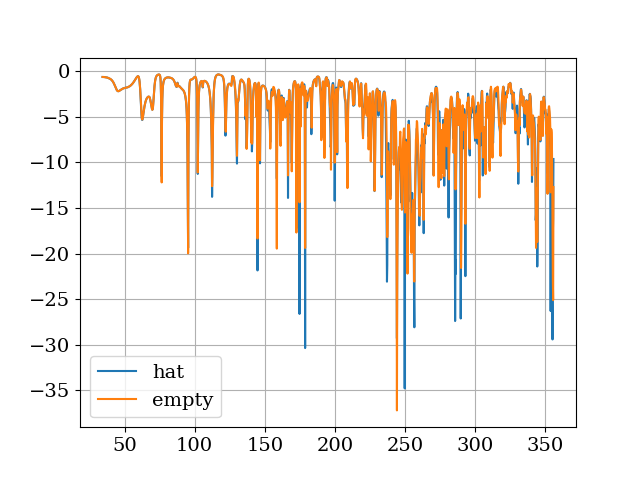

In [49]:
freqs = df_meas['Frequency'].unique()/1e6
startIdx = 150
stopIdx = 1600

plt.close('all')

if 0:
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'hat_onBox.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'hat')
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'can_onBox.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'can')
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'BNA_onBox.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'BNC')
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'SMA_onBox.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'SMA')
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'emptyRoom.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'empty')
    plt.plot(freqs[startIdx:stopIdx], (df_meas[df_meas['Index'] == 'allKindsOfShit.csv'])['S11_Magnitude'][startIdx:stopIdx], label = 'shit')
    plt.legend()
    plt.grid()

if 1:
    plt.figure()
    plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'hat_onBox.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'hat')
    #plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'can_onBox.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'can')
    #plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'BNA_onBox.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'BNC')
    #plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'SMA_onBox.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'SMA')
    plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'emptyRoom.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'empty')
    #plt.plot(freqs[startIdx:stopIdx], 20*np.log10((df_meas[df_meas['Index'] == 'allKindsOfShit.csv'])['S11_Magnitude'])[startIdx:stopIdx], label = 'shit')
    plt.legend()
    plt.grid()
    
   

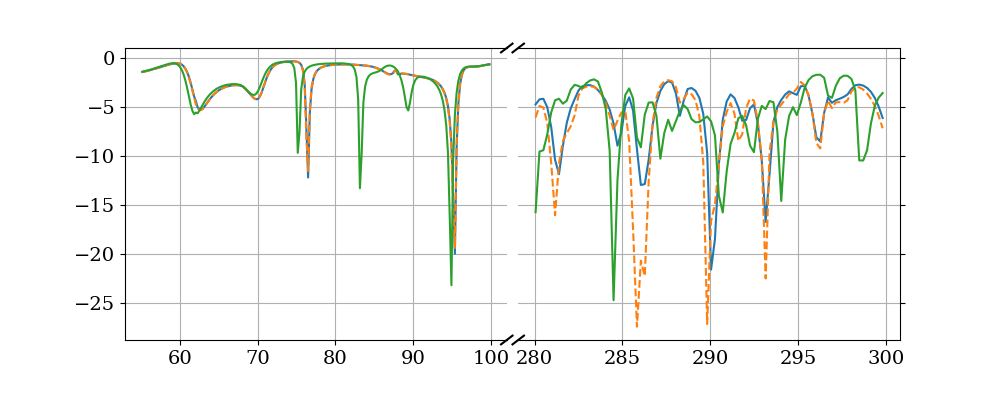

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define freq2Idx function
def freq2Idx(freqs, minfreq, maxfreq):
    startIdx = np.searchsorted(freqs, minfreq)
    stopIdx = np.searchsorted(freqs, maxfreq, side='right')
    return startIdx, stopIdx

# Frequency array in MHz
freqs = df_meas['Frequency'].unique() / 1e6  # Convert to MHz

# Determine start and stop indices for low and high frequency ranges
low_startIdx, low_stopIdx = freq2Idx(freqs, 55, 100)
high_startIdx, high_stopIdx = freq2Idx(freqs, 280, 300)

# Close any previous plots
plt.close('all')

# Create subplots with shared y-axis and adjust figure size for a wider aspect ratio
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(10, 4))  # Adjust width for a wider plot
f.subplots_adjust(wspace=0.03, bottom=0.15)  # Increase bottom space to prevent x-label cutoff


# Plot each configuration individually to allow for separate control
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'emptyRoom.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='empty')
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'hat_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='hat', linestyle = '--')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'can_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='can')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'BNA_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='BNA')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'SMA_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='SMA')
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'allKindsOfShit.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='shit')

# Plot for high frequency range on the second axis
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'emptyRoom.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'hat_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_', linestyle = '--')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'can_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'BNA_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'SMA_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'allKindsOfShit.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')


# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Adjust tick visibility
ax.yaxis.tick_left()
ax.tick_params(labelright=False)  # Disable right tick labels on the first subplot
ax2.yaxis.tick_right()

# Add diagonal cut-out lines
d = .015  # Size of the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)  # Top-left diagonal
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # Bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the right subplot
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # Top-right diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Bottom-right diagonal

# Add legend and grid
#ax.legend()
ax.grid()
ax2.grid()
plt.show()
f.text(0.5, 0.0051, 'Frequency [MHz]', ha='center', fontsize=16)
ax.set_ylabel(r'$S_{11}$ [dB]')  # Y-axis label with LaTeX formatting
plt.tight_layout()


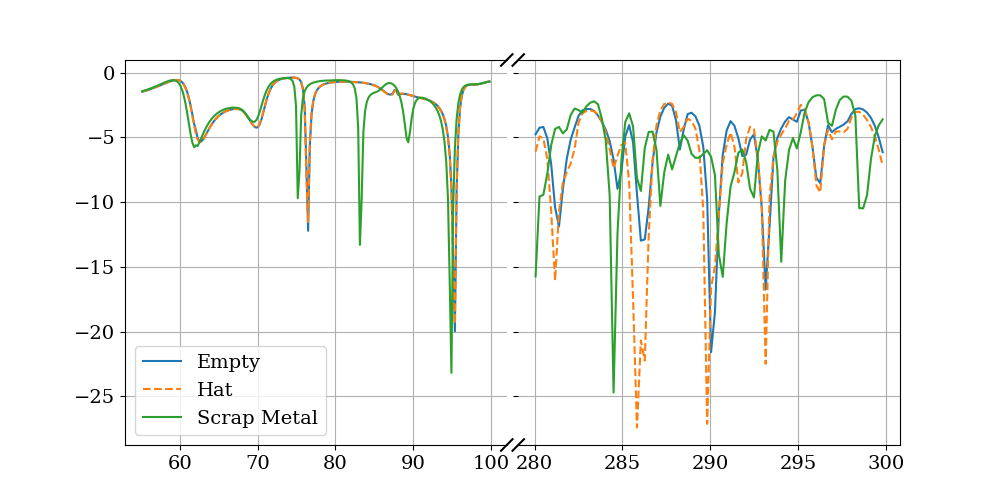

Text(68.59722222222221, 0.5, '$S_{11}$ [dB]')

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Define freq2Idx function
def freq2Idx(freqs, minfreq, maxfreq):
    startIdx = np.searchsorted(freqs, minfreq)
    stopIdx = np.searchsorted(freqs, maxfreq, side='right')
    return startIdx, stopIdx

# Frequency array in MHz
freqs = df_meas['Frequency'].unique() / 1e6  # Convert to MHz

# Determine start and stop indices for low and high frequency ranges
low_startIdx, low_stopIdx = freq2Idx(freqs, 55, 100)
high_startIdx, high_stopIdx = freq2Idx(freqs, 280, 300)

# Calculate width ratios based on frequency span
low_span = freqs[low_stopIdx] - freqs[low_startIdx]
high_span = freqs[high_stopIdx] - freqs[high_startIdx]
width_ratios = [low_span, high_span]
width_ratios = [0.5,0.5]

# Close any previous plots
plt.close('all')

# Create subplots with shared y-axis, adjusted width ratios, and wider aspect ratio
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios, wspace=0.03)

# First subplot for low frequency range
ax = fig.add_subplot(gs[0])
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'emptyRoom.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='Empty')
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'hat_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='Hat', linestyle = '--')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'can_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='can')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'BNA_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='BNA')
#ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'SMA_onBox.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='SMA')
ax.plot(freqs[low_startIdx:low_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'allKindsOfShit.csv']['S11_Magnitude'].values[low_startIdx:low_stopIdx]), label='Scrap Metal')
ax.legend()

# Second subplot for high frequency range
ax2 = fig.add_subplot(gs[1], sharey=ax)
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'emptyRoom.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'hat_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_', linestyle = '--')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'can_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'BNA_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
#ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'SMA_onBox.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')
ax2.plot(freqs[high_startIdx:high_stopIdx], 20 * np.log10(df_meas[df_meas['Index'] == 'allKindsOfShit.csv']['S11_Magnitude'].values[high_startIdx:high_stopIdx]), label='_nolegend_')

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Adjust tick visibility
ax.yaxis.tick_left()
ax.tick_params(labelright=False)  # Disable right tick labels on the first subplot
#ax2.yaxis.tick_right()
ax2.tick_params(labelleft=False)  # Disable right tick labels on the first subplot

# Add diagonal cut-out lines
d = .015  # Size of the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)  # Top-left diagonal
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # Bottom-left diagonal


kwargs.update(transform=ax2.transAxes)  # Switch to the right subplot
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # Top-right diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Bottom-right diagonal

# Add legend and grid
#ax.legend()
ax.grid()
ax2.grid()
plt.show()
fig.text(0.5, 0.011, 'Frequency [MHz]', ha='center', fontsize=16)
ax.set_ylabel(r'$S_{11}$ [dB]')  # Y-axis label with LaTeX formatting
#plt.tight_layout()
